<a href="https://colab.research.google.com/github/octaviobedregal/maestria/blob/master/Practica03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. INGRESAMOS PUNTOS (ENTRENAMIENTO Y PRUEBAS)**

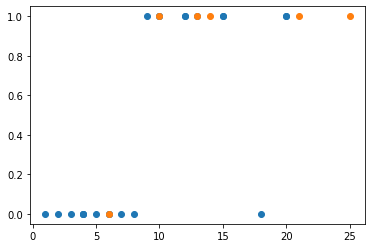

In [43]:
import pylab as pl
import numpy as np
import math as math

#Puntos de entenammiento
X1 = [5, 7, 2, 13, 4, 15, 9, 4, 6, 1, 3, 10, 4, 10, 8, 20, 18, 15, 20, 12, 6, 12]
Y1 = [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]
#Puntos para pruebas
X2 = [13, 14, 10, 6, 21, 25]
Y2 = [1, 1, 1, 0, 1, 1]

pl.scatter(X1,Y1)
pl.scatter(X2,Y2)
pl.show()

**2. GENERAMOS REGRESIÓN LOGISTICA**


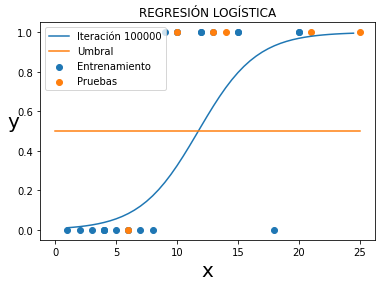

In [48]:
f = open ('GradienteDescendiente.txt','w')
f.write('ALUMNO: Octavio Bedregal Flores\n')
f.write('\nPARAMETROS INICIALES:\n')

n = len(X1);
m = 1
b = 0
rate = 0.01
umbral = 0.5
iteraciones = 100000

f.write('PENDIENTE ANTERIOR: '+str(m)+'\n')
f.write('INTERCEPTO ANTERIOR: '+str(b)+'\n')
f.write('TASA DE APRENDIZAJE: '+str(rate)+'\n')
f.write('CANTIDAD DE ITERACIONES: '+str(iteraciones)+'\n')
f.write('UMBRAL: '+str(umbral)+'\n')
f.write('DATOS DE ENTRENAMIENO:\n')
f.write('X '+str(X1)+'\nY '+str(Y1))
f.write('\nDATOS DE TEST:\n')
f.write('X '+str(X2)+'\nY '+str(Y2)+'\n')

for i in range(1, (iteraciones+1)):
  f.write('\nITERACIÓN '+str(i)+':\n')
  f.write('PENDIENTE ANTERIOR: '+str(m)+'\n')
  f.write('INTERCEPTO ANTERIOR: '+str(b)+'\n')
  sumM = 0;
  sumB = 0;
  sumE = 0;
  for i2 in range(n):
    x = X1[i2];
    y = Y1[i2];
    z = (m*x+b);
    y2 = 1/(1 + np.e**(-z));
    sumE += -(y*np.log(y2)+(1-y)*np.log(1-y2));
    sumM += (y2-y)*x;
    sumB += y2-y;
  f.write('ERROR: '+str(sumE)+'\n')
  f.write('TASA DE APRENDIZAJE: '+str(rate)+'\n')
  f.write('DERIVADA PENDIENTE: '+str(sumM)+'\n')
  f.write('DERIVADA INTERCEPTO: '+str(sumB)+'\n')
  m = m - (rate*sumM);
  b = b - (rate*sumB);
  f.write('PENDIENTE NUEVA: '+str(m)+'\n')
  f.write('INTERCEPTO NUEVO: '+str(b)+'\n')

f.write('\nTEST:')
n = len(X2) 
pA = 0;
for i in range(n):
    x = X2[i];
    y = Y2[i];
    z = (m*x+b);
    y2 = 1;
    if((1/(1 + np.e**(-z)))< umbral):
      y2 = 0;
    f.write('\nDATO '+str(i+1)+': '+str(x)+', ')
    f.write('ESTIMADO: '+str(y2)+', ')
    f.write('REAL: '+str(y)+', ')
    if(y == y2):
      pA +=1;
      f.write('CORRECTO')
    else:
      f.write('INCORRECTO')
f.write('\nPORCENTAJE DE ACIERTO: '+str((n/pA)*100)+'%')
f.close() 

xL=np.arange(1, 25, 0.5)
yL=1/(1+np.e**-(m*xL+b))

pl.title("REGRESIÓN LOGÍSTICA")
pl.xlabel("x", fontsize=20)
pl.ylabel("y", rotation=0, fontsize=20)
pl.plot(xL,yL, label = "Iteración "+str(iteraciones))
pl.scatter(X1,Y1, label = "Entrenamiento")
pl.scatter(X2,Y2, label = "Pruebas")
pl.plot([0,25], [0.5, 0.5], label = "Umbral")
pl.legend()

pl.show()